In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Estacionariedade

A média e a variância de processos estacionários são constantes ao longo do tempo, intuitivamente isto significa que as observações se desenvolvem aleatoriamente entorno de um certo nível com variabilidade constante.

In [ ]:
# Séries temporais
df_1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações") #IBGE - Trimestral
df_2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar") #Economial UOL - diária

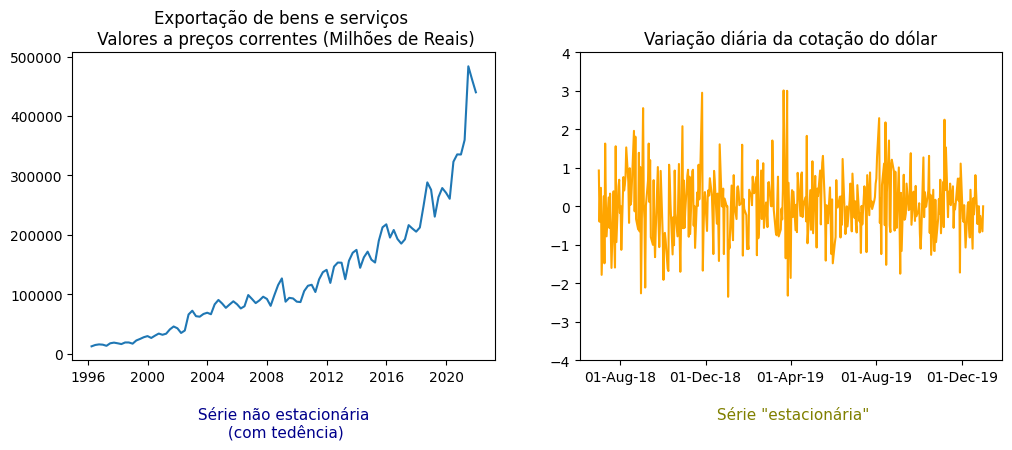

In [ ]:
#@markdown Gráfico das séries
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='3/1/1996', end='12/31/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')

df_1.index=index_dates1
df_2.index=index_dates2

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.plot(df_1.index, df_1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)',fontdict = {'fontsize' : 12})
ax1.set_xlabel('\n Série não estacionária \n (com tedência)',fontdict = {'fontsize' : 11},color="darkblue")


ax2.plot(df_2.index.to_pydatetime(), df_2["Var"], c='orange')
ax2.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax2.set_title('Variação diária da cotação do dólar',fontdict = {'fontsize' : 12})
ax2.set_xlabel('\n Série "estacionária"',fontdict = {'fontsize' : 11},color="olive")

ax2.set_ylim([-4, 4]);


### Teste Augmented Dickey-Fuller (ADF)

O teste de Dickey-Fuller Aumentado (ADF) é um teste estatístico comumente usado para verificar a presença de uma tendência estocástica em uma série temporal.

$$H_0: \text{A série não é estacionária}$$
$$H_1: \text{A série é estacionária}$$

Se o valor-p for menor que um determinado nível de significância (geralmente 0,05), então rejeitamos a hipótese nula e concluímos que a série é estacionária, ou seja, não possui uma tendência estocástica significativa.

In [ ]:
#  Exportações
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_1.Exportações)
print('p-value: %f' % result[1])

p-value: 0.997366


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_2.Var)
print('p-value: %f' % result[1])

p-value: 0.000000


#Decomposição de séries temporais

A decomposição de uma série temporal é o processo de separar a série em diferentes componentes: tendência, sazonalidade e componente aleatório, isto permite a detecção de padrões, identificação de tendências e sazonalidades, e auxiliando na previsão de valores da série.



<img src="http://www.orlandoalbarracin.com.br/phyton/decomposition.png" width=450, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

*   **Tendência**  direção geral dos dados ao longo do tempo, indica se a série está aumentando, diminuindo ou permanecendo estável ao longo de um período de tempo.

*   **Sazonalidade** refere-se a padrões que se repetem em períodos fixos de tempo, como estações do ano, dias da semana ou meses.

*   **Componente aleatório (erro)**: representa a variabilidade não explicada pela tendência e sazonalidade.

# Australian beer production e Airline Passenger Numbers

Produção mensal de cerveja na Austrália: megalitros. Não inclui bebidas com teor alcoólico inferior a 1,15.

###1.  Verifique visualmente se as séries apresentam tendências e/ou sazonalidades

In [ ]:
# Lendo os dados
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ejgao/Time-Series-Datasets/master/monthly-beer-production-in-austr.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df=df.iloc[48:252,:].reset_index(drop=True)

In [ ]:
df.head()

,Month,Monthly beer production
0,1960-01,97.1
1,1960-02,93.0
2,1960-03,96.0
3,1960-04,80.5
4,1960-05,76.1


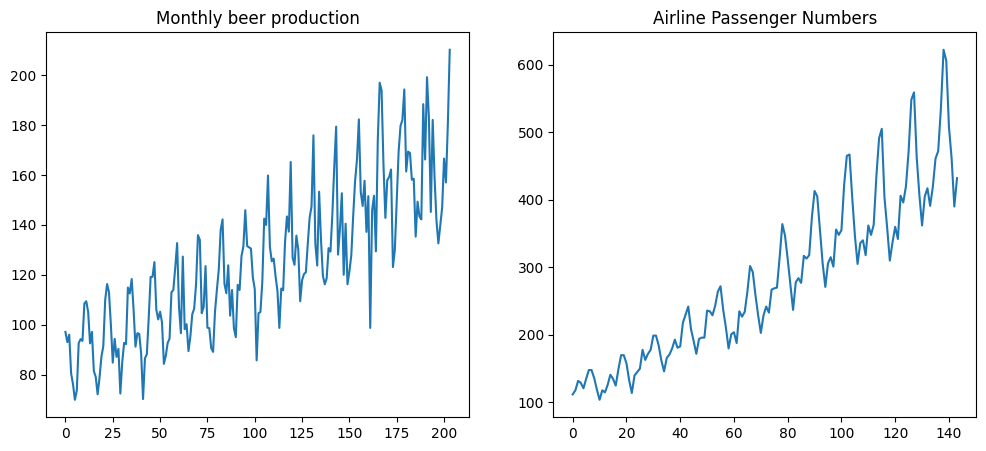

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df["Monthly beer production"])
plt.title("Monthly beer production")

plt.subplot(1,2,2)
plt.plot(df2["Passengers"])
plt.title("Airline Passenger Numbers")

plt.show()

Observação:

*   **Monthly beer production:**
A variação sazonal parece constante; ela não muda quando o valor da série temporal aumenta. Devemos usar o modelo aditivo.
$Valor = Tendência +  Sazonalidade + Erro$

*   **Airline Passenger Numbers**
À medida que a série temporal aumenta em magnitude, a variação sazonal também aumenta. Nesse caso, devemos usar o modelo multiplicativo. $ Valor = Tendência \times Sazonalidade \times Erro$



### 2. Faça uma análise descritiva da produção de cerveja por mês. Em qual mês a produção é maior e em qual é menor?

In [ ]:
# Vamos ver o formato da base de dados!
df.head()

,Month,Monthly beer production
0,1960-01,97.1
1,1960-02,93.0
2,1960-03,96.0
3,1960-04,80.5
4,1960-05,76.1


In [ ]:
df[['Ano', 'Mês']] = df['Month'].apply(lambda x: pd.Series(x.split('-')))
df.drop("Month", axis=1, inplace=True)

In [ ]:
df.head()

,Monthly beer production,Ano,Mês
0,97.1,1960,01
1,93.0,1960,02
2,96.0,1960,03
3,80.5,1960,04
4,76.1,1960,05


<Axes: xlabel='Mês'>

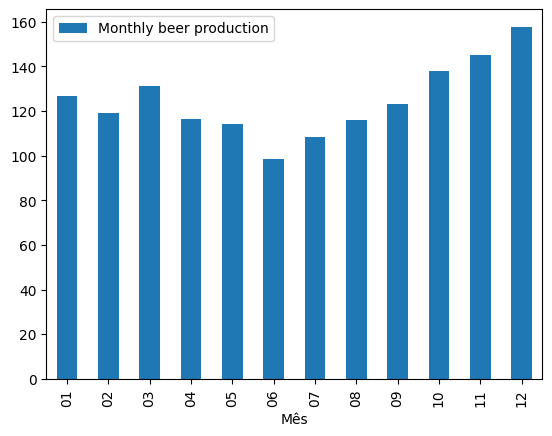

In [ ]:
# Produção por mês!

df.groupby("Mês").mean().plot(kind="bar")

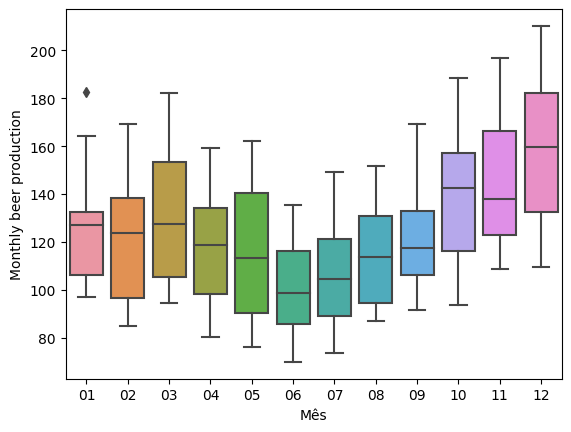

In [ ]:
# Produção por mês!
sns.boxplot(x="Mês", y="Monthly beer production", data=df)
plt.show()

###3. Ajuste um modelo de regressão linear para a série produção de cerveja. Faça as previsões para o próximo ano. Comente!

In [ ]:
# Vamos criar uma coluna com o tempo para ajustar o modelo de regressão

df["time"]=np.arange(len(df))
df.head()

,Monthly beer production,Ano,Mês,time
0,97.1,1960,01,0
1,93.0,1960,02,1
2,96.0,1960,03,2
3,80.5,1960,04,3
4,76.1,1960,05,4


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='df["Monthly beer production"] ~ time', data=df)
result = model.fit()
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     df["Monthly beer production"]   R-squared:                       0.670
Model:                                       OLS   Adj. R-squared:                  0.668
Method:                            Least Squares   F-statistic:                     409.9
Date:                           Wed, 01 Nov 2023   Prob (F-statistic):           1.66e-50
Time:                                   22:22:08   Log-Likelihood:                -867.99
No. Observations:                            204   AIC:                             1740.
Df Residuals:                                202   BIC:                             1747.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
# previsões 12 meses

new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df), len(df) + 12)

In [ ]:
new_times['prediction'] = result.predict(new_times)
new_times.head()

,time,prediction
0,204,166.793862
1,205,167.206207
2,206,167.618553
3,207,168.030899
4,208,168.443244


<Axes: xlabel='time', ylabel='prediction'>

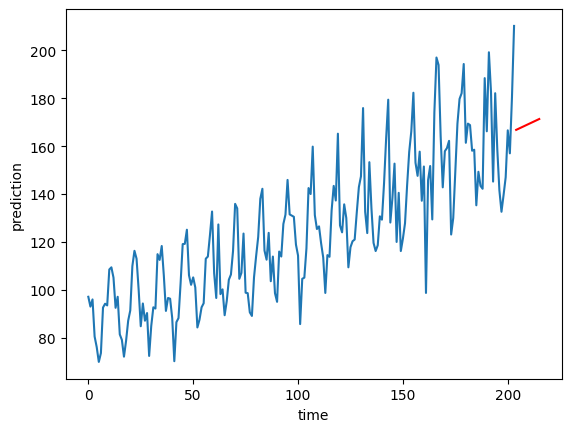

In [ ]:
plt.plot(df["Monthly beer production"])
sns.lineplot(x='time', y='prediction', data=new_times, color='red')

### 4. Faça a decomposição da série. Comente!

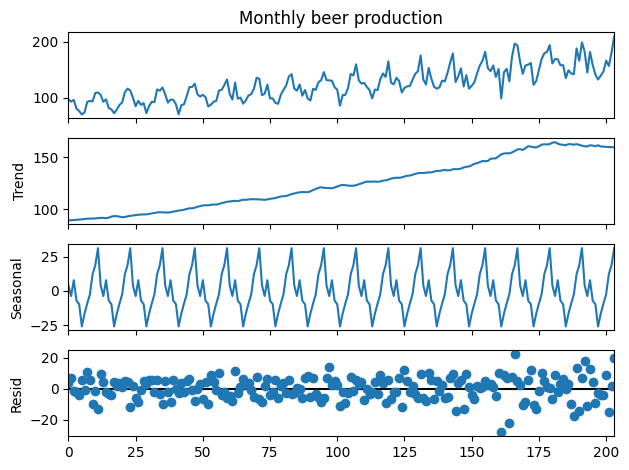

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df["Monthly beer production"],
                                 model='additive',
                                 period=12,
                                 extrapolate_trend='freq')
decomposition.plot();

### 5. Analise como formam decompostos (tend+saz+resid) os valores da série em janeiro e dezembro de 1961.

In [ ]:
# Obter os componentes da decomposição

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
df["trend"]=trend
df["seasonal"]=seasonal
df["residual"]=residual

In [ ]:
df.head()

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
0,97.1,1960,01,0,89.312811,4.066108,3.721081
1,93.0,1960,02,1,89.518973,-3.676411,7.157438
2,96.0,1960,03,2,89.725136,7.859501,-1.584637
3,80.5,1960,04,3,89.931299,-6.991597,-2.439702
4,76.1,1960,05,4,90.137461,-9.723822,-4.313639


In [ ]:
df[(df.Ano=="1961") & (df.Mês=="01")]

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
12,105.1,1961,01,12,91.804167,4.066108,9.229725


In [ ]:
df[(df.Ano=="1961") & (df.Mês=="12")]

,Monthly beer production,Ano,Mês,time,trend,seasonal,residual
23,113.0,1961,12,23,93.7625,31.25264,-12.01514


###6. Verifique estatísticamente se os resíduos obtidos da decomposiçã da série são estacionários. Use $\alpha=0,05$.

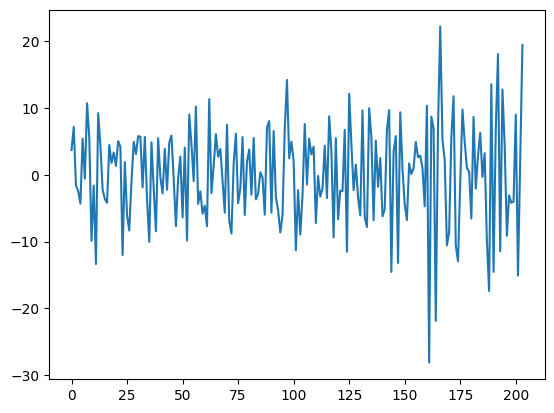

In [ ]:
plt.plot(df.residual);

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.residual)
print('p-value: %f' % result[1])

p-value: 0.000000


### 7. Responda as seguinte perguntas usando os dados Airline Passenger Numbers




*   A série é estacionária?
*   A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?
*   Em quais meses vende-se, em média, mais (menos) passagens aereas?
*   Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?
*   Determinar o aumento percentual das vendas médias registradas em janeiro em relação a dezembro.
Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100 .
*   Ajuste um modelo de regressão (sem considerar os dados do último ano). Faça as previsões para o seguinte ano. Calcule o Erro médio de previsão: Média entre as diferenças absolutas do valor previsto e o valor real correspondente.
*   Decompor a série em trend+saz+residuals. Qual o componente sazonal para os meses: janeiro, junho e dezembro.
*   Analise como formam decompostos (tend+saz+resid) os valores observados no último trimestre.
*   Faça um histograma dos residuals, eles seguem uma distribuição normal? Use a função shapiro da biblioteca scipy.stats para verificar a normalidade.
*   Verifique estatísticamente se os resíduos são estacionários.

### Respostas

A série é estacionária?

A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?

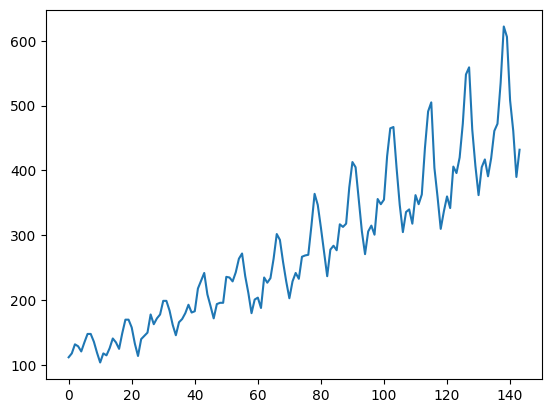

In [ ]:
#Estacionária?
plt.plot(df2.Passengers)

In [ ]:
df2

,Passengers,Ano,Mês,time,trend,seasonal,residual
0,112,1949,01,0,118.588481,0.911256,1.036418
1,118,1949,02,1,119.734169,0.890342,1.106896
2,132,1949,03,2,120.879856,1.012397,1.078621
3,129,1949,04,3,122.025544,0.980719,1.077940
4,121,1949,05,4,123.171232,0.979495,1.002938
...,...,...,...,...,...,...,...
139,606,1960,08,139,486.355575,1.219640,1.021614
140,508,1960,09,140,490.716443,1.056262,0.980080
141,461,1960,10,141,495.077312,0.920694,1.011376
142,390,1960,11,142,499.438180,0.797882,0.978688


A série não é estacionária. Observa-se que seus os valores aumentam ao longo do tempo (Há tendência e comportamento sazonal).

Nota-se que a amplitude do componente sazonal aumenta conforme  a tendência aumenta. Assim, recomenda-se um modelo multiplicativo.


In [ ]:
# Em quais meses vende-se, em média, mais (menos) passagens aereas?

In [ ]:
df2[['Ano', 'Mês']] = df2['Month'].apply(lambda x: pd.Series(x.split('-')))
df2.drop("Month", axis=1, inplace=True)

In [ ]:
df2.head()

,Passengers,Ano,Mês
0,112,1949,01
1,118,1949,02
2,132,1949,03
3,129,1949,04
4,121,1949,05


<Axes: xlabel='Mês'>

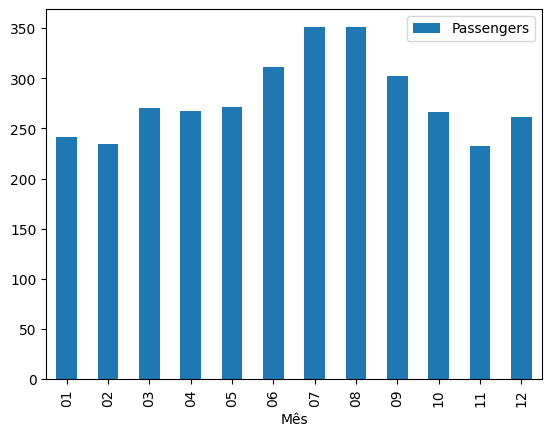

In [ ]:
df2.groupby("Mês").mean().plot(kind="bar")

Vende-se mais em julho e agosto!

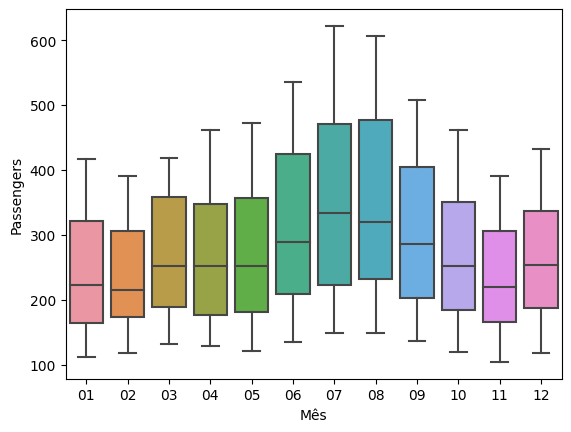

In [ ]:
# Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?
sns.boxplot(x="Mês", y="Passengers", data=df2)
plt.show()

Não se observam outliers!

In [ ]:
#Determinar o aumento percentual das vendas médias registradas em janeiro em relação a dezembro

df2.groupby("Mês").mean()

,Passengers
Mês,
01,241.750000
02,235.000000
03,270.166667
04,267.083333
05,271.833333
06,311.666667
07,351.333333
08,351.083333
09,302.416667


In [ ]:
jan=df2.groupby("Mês").mean().Passengers[0]
dez=df2.groupby("Mês").mean().Passengers[11]

In [ ]:
(jan-dez)/dez*100

-7.670273711012088

In [ ]:
#Ajuste um modelo de regressão

df2["time"]=np.arange(len(df2))
df2.tail(12)

,Passengers,Ano,Mês,time
132,417,1960,01,132
133,391,1960,02,133
134,419,1960,03,134
135,461,1960,04,135
136,472,1960,05,136
137,535,1960,06,137
138,622,1960,07,138
139,606,1960,08,139
140,508,1960,09,140
141,461,1960,10,141


In [ ]:
df3=df2.iloc[0:(len(df2)-12),:]
df3.tail()

,Passengers,Ano,Mês,time
127,559,1959,08,127
128,463,1959,09,128
129,407,1959,10,129
130,362,1959,11,130
131,405,1959,12,131


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Passengers ~ time', data=df3)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     713.0
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.28e-54
Time:                        22:22:13   Log-Likelihood:                -679.77
No. Observations:                 132   AIC:                             1364.
Df Residuals:                     130   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.5692      7.276     12.998      0.0

In [ ]:
# previsoes

new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df3), len(df3) + 12)

In [ ]:
new_times['prediction'] = result.predict(new_times)
new_times.head()

,time,prediction
0,132,432.979412
1,133,435.543127
2,134,438.106841
3,135,440.670555
4,136,443.234269


In [ ]:
#Calcule o Erro médio de previsão

valor_real=df2.Passengers[132:].reset_index(drop=True)
new_times['valor_real']= valor_real

In [ ]:
new_times

,time,prediction,valor_real
0,132,432.979412,417
1,133,435.543127,391
2,134,438.106841,419
3,135,440.670555,461
4,136,443.234269,472
5,137,445.797983,535
6,138,448.361697,622
7,139,450.925411,606
8,140,453.489125,508
9,141,456.052839,461


In [ ]:
#Erro médio de previsão
np.mean(np.abs(new_times.prediction- new_times.valor_real))

58.657860096690946

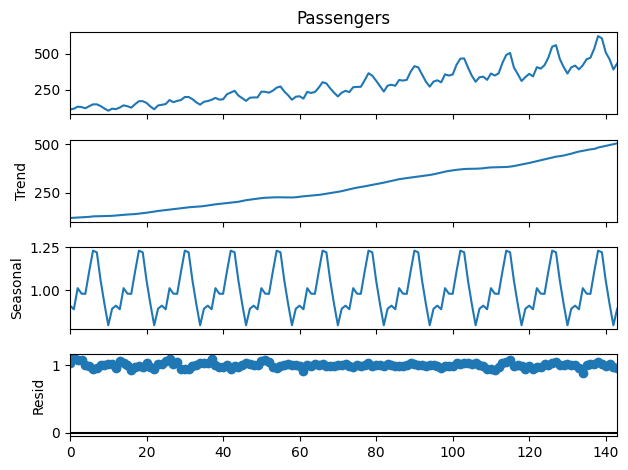

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df2["Passengers"],
                                 model='multiplicative',
                                 period=12,
                                 extrapolate_trend='freq')
decomposition.plot();

In [ ]:
# componentes
df2["trend"] = decomposition.trend
df2["seasonal"] = decomposition.seasonal
df2["residual"] = decomposition.resid

In [ ]:
# componente sazonal para os meses: janeiro, junho e dezembro.
df2.head(12)

,Passengers,Ano,Mês,time,trend,seasonal,residual
0,112,1949,01,0,118.588481,0.911256,1.036418
1,118,1949,02,1,119.734169,0.890342,1.106896
2,132,1949,03,2,120.879856,1.012397,1.078621
3,129,1949,04,3,122.025544,0.980719,1.077940
4,121,1949,05,4,123.171232,0.979495,1.002938
5,135,1949,06,5,124.316919,1.108310,0.979811
6,148,1949,07,6,126.791667,1.229422,0.949445
7,148,1949,08,7,127.250000,1.219640,0.953613
8,136,1949,09,8,127.958333,1.056262,1.006233
9,119,1949,10,9,128.583333,0.920694,1.005187


In [ ]:
df2.tail(3)

,Passengers,Ano,Mês,time,trend,seasonal,residual
141,461,1960,10,141,495.077312,0.920694,1.011376
142,390,1960,11,142,499.438180,0.797882,0.978688
143,432,1960,12,143,503.799048,0.893580,0.959606


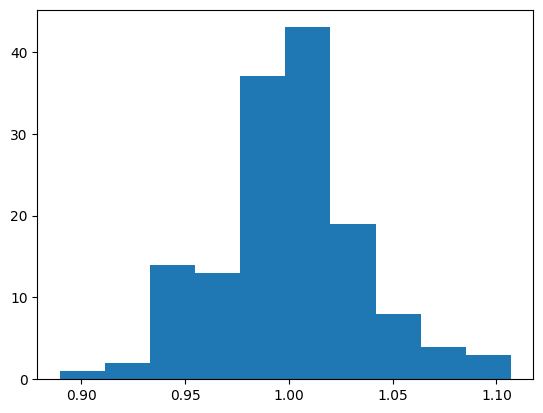

In [ ]:
# residuals
plt.hist(df2.residual);

In [ ]:
from scipy.stats  import shapiro

estatistica, p_valor = shapiro(df2.residual)
p_valor

0.06979888677597046

valor-p>0,05 não se rejeita H0 assume-se que seguem uma dist. normal

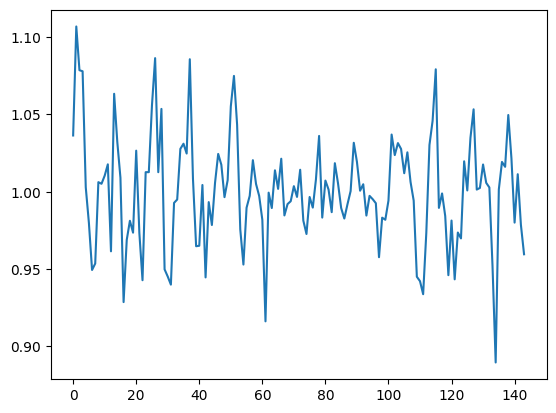

In [ ]:
plt.plot(df2.residual)

In [ ]:
# residuals estacionários?

from statsmodels.tsa.stattools import adfuller

result = adfuller(df2.residual)
print('p-value: %f' % result[1])

p-value: 0.000000


Sim, são estacionários


In [ ]:
df2.residual.describe()

count    144.000000
mean       1.000387
std        0.035366
min        0.889642
25%        0.981399
50%        1.001158
75%        1.019333
max        1.106896
Name: residual, dtype: float64